### CS/ECE/ISyE 524  - Introduction to Optimization - Fall 2018

# Using Regression to Predict Housing Prices

#### Yi Xian Soo (ysoo@wisc.edu) , Taijing Chen (tchen284@wisc.edu)

### Table of Contents
1. [Introduction](#1.-Introdiction)
2. [Mathematical Model](#2.-Mathematical-model) 
3. [Solution](#3.-Solution)
4. [Results and Discussion](#4.-Results-and-discussion)
5. [Conclusion](#5.-Conclusion)

## 1. Introduction ##
The first few sentences should give a quick overview of the entire project. Then, elaborate with a description of the problem that will be solved, a brief history (with [citations](https://en.wikipedia.org/wiki/Citation)) of how the problem came about, why it's important/interesting, and any other interesting facts you'd like to talk about. You should address and explain where the problem data is coming from (research? the internet? synthetically generated?) Also give an outline of the rest of the report.

This section should be 300-600 words long, and **should be accessible to a general audience** (don't assume your reader has taken the class!). Feel free to include images if you think it'll be helpful

A house is one of the biggest puchase that an average person will make. However, housing prices are determined by a wide variety of factors that are difficult to quantify and aren't at all obvious to the casual observer. In this project, we will attempt to predict housing prices located in Ames, Iowa using regression analysis with regularization. 


Dean De Cock was a graduate student at the Truman State University and he was looking for a data set that would allow the students in his statistic class to experiment their knowledge on. He required a data set that has a reasonably large number of variables and observations, hence, on his sabbatical leave, he contacted the Ames City Assessor's Office to be given access to city's housing data.

## 2. Mathematical models

In order to predict future housing prices based on the given data, we're going to apply different regression approaches to find the best linear model that determines the relationship between parameters and target housing prices. In this project, we will use $L_{\infty}$ regularization, $L_1$ regularization, $L_2$ regularization and combinations of them to avoid overfitting, and utilize the huber loss to avoid the outlier, so that we can get an accurate, robust and fruitful model on housing price prediction.

### A. Data Prepocessing
The Ames Housing dataset contains 1460 sets of data with 79 labels and corresponding housing prices (the last column). In the given data set, we need to deal with two different types of data: numerical variables and discrete variables. We need to clean the data and convert each feature into linear variables before we can use them.

#### a1. Numerical (continuous) variables
The followings are the labels containing numerical values. We can just use them without preprocessing.

|Label Name |LabelID|Description                                          
|-----------|-------|--------------------------------------------------------------
|MSSubClass |1      |Identifies the type of dwelling involved in the sale (in numerical form already)
|LotFrontage|3      |Linear feet of street connected to the property
|LotArea    |4      |Lot size in square feet
|YearBuilt  |19     |Original construction date
|YearRemodAdd|20    |Remodel date
|MasVnrArea |26     |Masonry veneer area in square feet
|BsmtFinSF1 |34     |Type 1 finished square feet
|BsmtFinSF2 |36     |Type 2 finished square feet
|BsmtUnfSF  |37     |Unfinished square feet of basement area
|TotalBsmtSF|38     |Total square feet of basement area
|1stFlrSF   |43     |First Floor square feet
|2ndFlrSF   |44     |Second floor square feet
|LowQualFinSF|45    |Low quality finished square feet (all floors)
|GrLivArea  |46     |Above grade (ground) living area square feet
|BsmtFullBath|47    |Basement full bathrooms
|BsmtHalfBath|48    |Basement half bathrooms
|FullBath   |49     |Full bathrooms above grade
|HalfBath   |50     |Half baths above grade
|Bedroom    |51     |Bedrooms above grade (does NOT include basement bedrooms)
|Kitchen    |52     |Kitchens above grade
|TotRmsAbvGrd|54    |Total rooms above grade (does not include bathrooms)
|Fireplaces |56     |Number of fireplaces
|GarageYrBlt|59     |Year garage was built
|GarageCars |61     |Size of garage in car capacity
|GarageArea |62     |Size of garage in square feet
|WoodDeckSF |66     |Wood deck area in square feet
|OpenPorchSF|67     |Open porch area in square feet
|EnclosedPorch|68   |Enclosed porch area in square feet
|3SsnPorch  |69     |Three season porch area in square feet
|ScreenPorch|70     |Screen porch area in square feet
|PoolArea   |71     |Pool area in square feet
|MiscVal    |75     |$Value of miscellaneous feature
|MoSold     |76     |Month Sold (MM)
|YrSold     |77     |Year Sold (YYYY)


#### a2. Discrete variables
To solve the problem by linear programming, we need to use algebra to specify the discrete variables. There are two different discrete data in the Ames Housing dataset. **The first type of discrete variables, despite being discontinuous, only varies in the level of degrees.** For example, consider the following feature of "LotShape", which indicates the "general shape of the property":

|Features |Description |
|-----|------------|
|REG  |Regular     |
|IR1  |Slightly irregular|
|IR2  |Moderately irregular|
|IR3  |Irregular   |

For this types of variables, we will label them by increasing positive integers based on the level of degrees. Specifically,in the example of "LotShape", we will set the features to be: $$REG=1, IR1=2, IR2=3, IR3=4$$ This technique will be applied to the following labels: 

|Label Name |LabelID|Description                                          
|-----------|-------|-----------------------------------------------------------------
|LotShape   |7      |General shape of property
|LandContour|8      |Flatness of the property                             
|Utilities  |9      |Type of utilities available
|LotConfig  |10     |Lot Configuration
|LandSlope  |11     |Slope of the property
|Condition1 |13     |Proximity to various conditions
|Condition2 |14     |Proximity to various conditions (if more than one is present)
|BlgType    |15     |Type of dwelling
|HouseStyle |16     |Style of dwelling
|ExterQual  |27     |Evaluates the quality of the material on the exterior 
|ExterCond  |28     |Evaluates the present condition of the material on the exterior
|BsmtQual   |30     |Evaluates the height of the basement
|BsmtCond   |31     |Evaluates the general condition of the basement
|BsmtExposure|32    |Refers to walkout or garden level walls
|BsmtFinType1|33    |Rating of basement finished area
|BsmtFinType2|35    |Rating of basement finished area (if multiple types)
|HeatingQC  |40     |Heating quality and condition
|CentralAir |41     |Central air conditioning
|KitchenQual|53     |Kitchen quality
|Functional |55     |Home Functionality
|FireplaceQu|57     |Fireplace quality
|GarageType |58     |Garage location
|GarageFinish|60    |Interior finish of the garage
|GarageQual |63     |Garage quality
|GarageCond |64     |Garage condition
|PavedDrive |65     |Paved driveway
|PoolQC     |72     |Pool quality
|Fence      |73     |Fence quality
|SaleType   |78     |Type of sale
|SaleCondition| 79  |Condition of Sale


**The second type of discrete variables has no relation of degrees.** The values of these variables are different names of features corresponding to a given lable. For instance, in the example of "Alley", i.e., the "type of alley access to property", we have:

|Features |Description  |
|-----|-------------|
|Grvl |Gravel       |
|Pav  |Paved        |
|NA   |No alley access|

Since these are distinct features of a given label, it is no longer safe to lable them by increasing integers. To make these discrete variables linear, we need to change each of them into binary variables $1$ and $0$. $1$ means that the given label has this feature, and $0$ means the opposite. If a given lable $l$ has $m$ features, after the transformation, we will have $2^m$ new labels. In the other words, here's the new labels we have:

|Labels |Description  |
|-----|-------------|
|Grvl |has gravel (1) or not (0)
|Pav  |paved (1) or not (0)
|NA   |no alley access (1) or not (0)

This technique will be applied to the following data:

|Label Name |LabelID|Description                                          
|-----------|-------|-------------------------------------------------------------------
|MSZoning   |2      |Identifies the general zoning classification of the sale
|Street     |5      |Type of road access to property
|Alley      |6      |Type of alley access to property
|Neighborhood|12    |Physical locations within Ames city limits
|RoofStyle  |21     |Type of roof
|RoofMatl   |22     |Roof material
|Exterior1st|23     |Exterior covering on house
|Exterior2nd|24     |Exterior covering on house (if more than one material)
|MasVnrType |25     |Masonry veneer type
|Foundation |29     |Type of foundation
|Heating    |39     |Type of heating
|Electrical |42     |Electrical system
|MiscFeature|74     |Miscellaneous feature not covered in other categories


#### a4. Getting rid of poorly related labels

After transforming all labels into numerical ones, we are faced with a much larger dataset. Such large data might slow down the model and introduce unneccessary noise into the model. One way to solve this problem is to get rid of poorly related labels. Here, we will set it to 0.3: If the correlation r <= 0.3, we will not use the corresponding labels.

### B. A General Discussion of Linear Regression

Define $m =$ number of labels and $n =$ number of datasets. To predict the future housing prices, we can assign different weights to the labels. By doing this, the problem will be modeled by a linear function looks like this: $$\hat{y}=xw, w \in \Re^{m}$$
To find the model fits the data, we would like to use different approaches to find a linear function that gives a prediction as close as to the actual value. This is equivalent to solve the following model: 
$$
\begin{aligned}
\min_{x \in \Re^{n*m}} \quad & \sum_{i=1}^n difference(y,\hat{y}) \\  
s.t. \quad & \hat{y}=w^{\intercal}x
\end{aligned}
$$

A naive approach to this problem is use $L_{\infty}, L_1,$ and $L_2$ to minimize the difference between predictions and actual values. <br/>
Let $w=$weights of each label $\in\Re^{m}$; $A=$all datasets $\in\Re^{n*m}$; $x_i= i^{th}$ row in A $\in\Re^{1*m}$. We have the following optimization models.<br/>
<br/>

**$L_{\infty}$ cost**(Minimax/LP), which **equalizes** the solution
$$
\begin{aligned}
\min_{w} \quad & \max_{w} \lVert y_i-x_iw \rVert \\  
\end{aligned}
$$
standard LP form:
$$
\begin{aligned}
\min_{w,t} \quad & t \\  
s.t.       \quad & t \geq y-x_iw \\
           \quad & t \geq x_1w-y
\end{aligned}
\quad\implies\quad
\begin{aligned}
\min_{w,t} \quad & t \\  
s.t.       \quad & -t+x_iw \leq y \\
           \quad & -t-x_iw \leq -y
\end{aligned}
$$

**$L_1$ cost**(Epigraph trick/LP), which **spartifies** the solution
$$
\begin{aligned}
\min_{w} \quad & \sum_{i=1}^n  \lVert y_i-x_iw \rVert \\  
\end{aligned}
$$
standard LP form:
$$
\begin{aligned}
\min_{w,t} \quad & \sum_{i=1}^n  t_i \\  
s.t.       \quad & t_i \geq y-x_iw \\
           \quad & t_i \geq x_iw-y
\end{aligned}
\quad\implies\quad
\begin{aligned}
\min_{w,t} \quad & \sum_{i=1}^n  t_i \\  
s.t.       \quad & -t_i+x_iw \leq y \\
           \quad & -t_i-x_iw \leq -y
\end{aligned}
$$

**$L_2$ cost** (Least squares/QP), which **smooths** the solution
$$
\begin{aligned}
\min_{w} \quad & \lVert y-Aw \rVert^2 \\  
\end{aligned}
$$

However, in reality, we need to deal with outfitting and outliers. A reliable model should be able to cope with different situations and remain robust. An possible solution is using regularization. In the following paragraphs, we will use $L_2$ cost model as an example and discuss about how to make the model robust.

### Overfitting
Even though having various features sounds good for the sake of model training as they provides the models more options to look for, too many features can lead to negative outcomes when it goes to extreme. After knowing the details of the data, the model will sometimes overly pick up the noise and random fluctuations, which may not apply to new data, and generate a complicated function to fit the data. The complicated function can not only slow down the performance of the model, but also results in great error when predicting by new data. Since the problem is caused by the overly-complicated function, a possible solution to counteract this negative impact would be just simplifying the model. To do so, a common approach is to limit the weights $w$ in our model by regularization. Here, we will discuss three common regularization approaches dealing with overfitting in regression.

#### b1. L2 Regularization (Ridge Regression)
To make the model simple, we would prefer simple weight vector $w$. One way to achieve this goal is to constrain the values of $w$ by regularization. One common approach, Ridge regression, utilizes the features of L2 regularization to simplify the model via smoothing the values of $w$. It is in the following form:

$$
\begin{aligned}
\min_{w} \quad &  \lVert y-Aw \rVert^2 + \lambda\lVert w\rVert^2 \\  
\end{aligned}
$$

Sometimes, it is also written in a slightly different form:
$$
\begin{aligned}
\min_{w}   \quad & \lVert y-Aw\rVert^2 \\
\text{s.t} \quad & \lVert w\rVert^2 \leq t
\end{aligned}
$$

By plotting the feasible region and the objective function, we can observe some features of this type of regression.

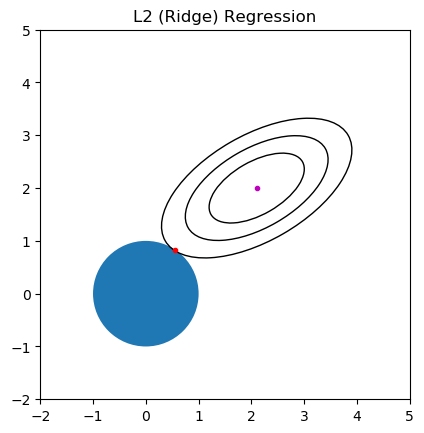

In [95]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

cfig = figure()
ax = cfig[:add_subplot](1,1,1)
ax[:set_aspect]("equal")
c = patch.Circle([0,0],1,linewidth=.5,zorder=0)
e1 = patch.Ellipse((2.1, 2), 4, 2, 30, fill=false)
e2 = patch.Ellipse((2.1, 2), 3, 1.5, 30, fill=false)
e3 = patch.Ellipse((2.1, 2), 2, 1, 30, fill=false)
ax[:add_artist](c)
ax[:add_artist](e1)
ax[:add_artist](e2)
ax[:add_artist](e3)
plot(0.56, 0.83, "r.")
plot(2.1, 2, "m.")
xlim(-2, 5)
ylim(-2, 5)
title("L2 (Ridge) Regression")
;

The blue region is the feasible region, and the ellipse-shaped lines are the objective contours. The ridge estimate is given by the point at which the ellipse and the circle touch. As we can see, the optimal point occurs on the edge of the circle. Since there is no corner point for the circle, the weight vector $w$ we get would unlikely contain entry of value 0. Therefore, this regularization approach tend to be more useful when most labels are useful.This is the main difference from the next model we are goint to discuss about: the L1 (Lasso) Regression.  

#### b2. L1 Regularization (Lasso Regression)
As mentioned previously, if we use the L2 (Ridge) regression, the weight vector $w$ is unlikely to go zero. However, in the given dataset, there are 79 labels. Not all of them have effect on the housing price. In these cases, to assign zero weight to these label may be a better option. One applicable method is that before regression, we can plot the correlation matrix between labels and the housing prices, and eliminate the labels if their correlation is too low. However, this requires us to manually discard the labels that we do not want to use.
A better method that automate this process is the Lasso regression which incoperate L1 regularization:

$$
\begin{aligned}
\min_{w} \quad & \lVert y-Aw\rVert^2 + \lambda\sum_{i=1}^n\lVert w_i\rVert \\  
\end{aligned}
$$

It can be written in this form as well:

$$
\begin{aligned}
\min_{w} \quad & \lVert y-Aw \rVert^2 \\
\text{s.t.} \quad & \sum_{i=1}^n\lVert w_i\rVert \leq t
\end{aligned}
$$

Because this approach uses the L1 regularization, as discussed previously, the values of $w$ obtained will tend to be sparse. As a result, this regularizaiton simplify $w$ by generating as many zero entries as possible. By plotting the feasible region and the objective function, we can observe some other features of L1 regularization as well:


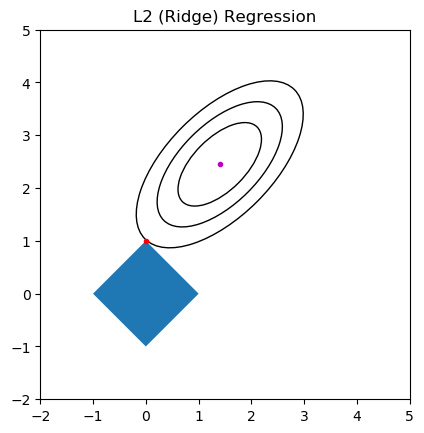

In [96]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

cfig = figure()
ax = cfig[:add_subplot](1,1,1)
ax[:set_aspect]("equal")
r = patch.Polygon([(0,1), (1,0), (0,-1), (-1,0)])
e1 = patch.Ellipse((1.4, 2.45), 4, 2, 45, fill=false)
e2 = patch.Ellipse((1.4, 2.45), 3, 1.5, 45, fill=false)
e3 = patch.Ellipse((1.4, 2.45), 2, 1, 45, fill=false)
ax[:add_artist](r)
ax[:add_artist](e1)
ax[:add_artist](e2)
ax[:add_artist](e3)
plot(0, 1, "r.")
plot(1.4, 2.45, "m.")
xlim(-2, 5)
ylim(-2, 5)
title("L2 (Ridge) Regression")
;

Again, the blue region is the feasible region, and the ellipse-shaped lines are the objective contours. Unlike the graph for L2 regularization, the optimal points always occur at the corner of the feasible region, which means that the entries in weight vector $w$ can go to zero. Therefore, the L2 regularization can eliminate useless variables. Compared with L1 regularization, tt is more powerful when there're lots of useless variables.

#### b3. Combination of L1 Regularization & L2 Regularization
Because both L1 regularization & L2 regularization have their strengths and weaknesses, we can get a better model if we conbime them together:

$$
\begin{aligned}
\min_{w} \quad &  \lVert y-Aw\rVert^2 + \lambda\lVert w\rVert^2 + \mu\sum_{i=1}^n\lVert w_i\rVert \\  
\end{aligned} \\
\lambda\lVert w\rVert^2 \implies \quad \text{smooth } w \\
\sum_{i=1}^n\lVert w_i\rVert \implies \quad \text{sparsify } w 
$$


#### b4. Robust Regresssion using Huber Loss
Since there are 1460 sets of data, this datasets may contains much noise. Ideally, to clean the data, we can plot the data and remove the outliers manually. However, due to large number of data and labels, it is not realistic to do so. To make the model robust, we will apply the Huber Loss to our model so that the outliers can be excluded automatically. Here is the formula fro the Huber Loss: 

$$
\begin{aligned}
\Phi(x) &= 
    \begin{cases}
     x^2    &\text{if} -M \leq x \leq M \\
     2M\lvert x \rvert -M^2 &\text{otherwise} 
    \end{cases} \\
    &\text{,where M determines where to transit from linear to quadratic}
\end{aligned}
$$

To make such loss function appliable to the solver, we will use the following convex QP form instead:

$$
\begin{aligned}
\Phi(x) = 
    \begin{cases}
    \min_{v,w}  &w^2+2Mv \\
    \text{s.t.} &\lvert x \rvert \leq w+v \\
                &v \geq 0 \\
                &w \leq M
    \end{cases}
\end{aligned}
$$

The objective function of regression using the Huber Loss will be:

$$
\sum_{i=1}^{n} \Phi(y_i-ax_i)
$$

Here are the models we will get after combining the Huber Loss and different regularizations. <br/>

**Ridge Regression + Huber Loss**:
$$
\begin{aligned}
    \min_{w} \quad &  \sum_{i=1}^{n} \Phi(y_i-x_iw) + \lambda\lVert w\rVert^2 \\  
\end{aligned}
$$

**Lasso Regression + Huber Loss**:
$$
\begin{aligned}
    \min_{w} \quad & \sum_{i=1}^{n} \Phi(y_i-x_iw) + \lambda\sum_{i=1}^n\lVert w_i\rVert \\  
\end{aligned}
$$

**L1 + L2 + Huber Loss**:
$$
\begin{aligned}
\min_{w} \quad &  \sum_{i=1}^{n} \Phi(y_i-x_iw) + \lambda\lVert w\rVert^2 + \mu\sum_{i=1}^n\lVert w_i\rVert \\  
\end{aligned}
$$

### C. A Discussion on Trade-off

## 3. Solution ##
Here, you should code up your model in Julia + JuMP and solve it. Your code should be clean, easy to read, well annotated and commented, and it should compile! You are not allowed to use other programming languages or DCP packages such as `convex.jl`. **I will be running your code**. I suggest having multiple code blocks separated by text blocks that explain the various parts of your solution. You may also solve several versions of your problem with different models/assumptions.

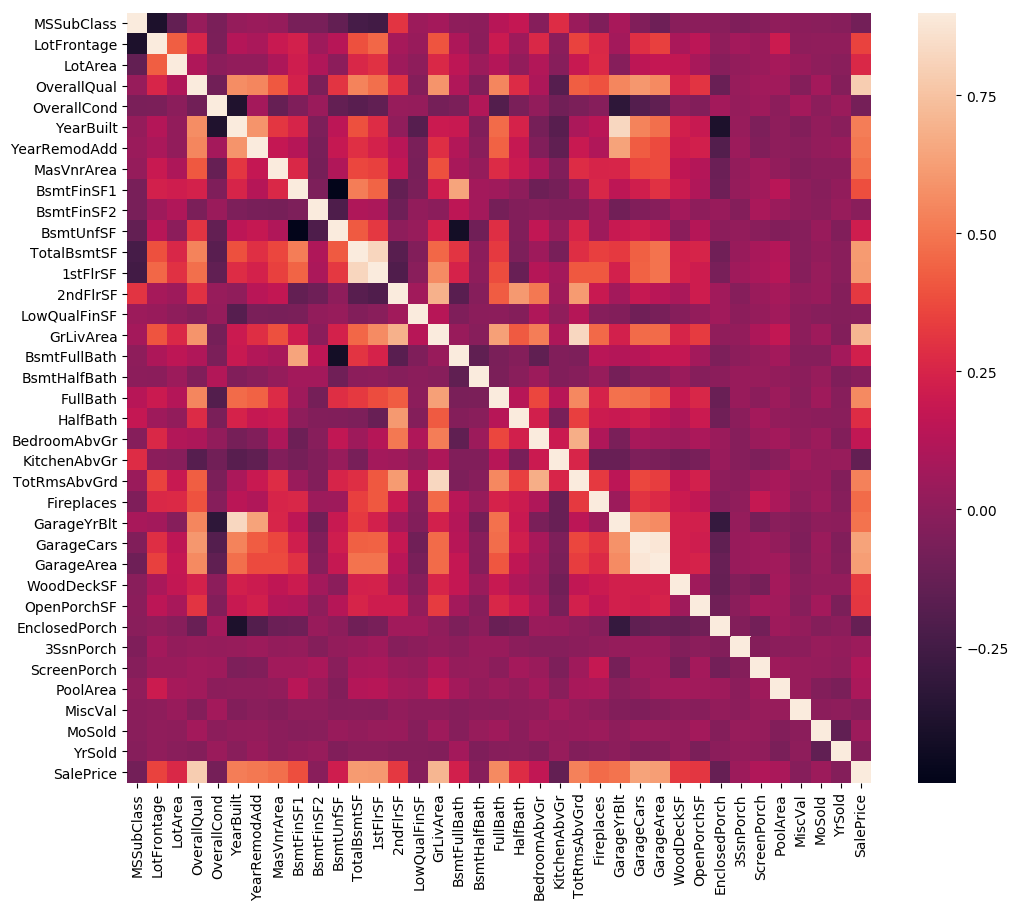

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x0000000054FC7208>

In [116]:
using JuMP, PyCall, PyPlot
@pyimport pandas as pd
@pyimport seaborn as sns
train = pd.read_csv("train.csv")
train = train[:drop](columns="Id")
corrmat = train[:corr]()
plt[:figure](figsize=(12,10))
sns.heatmap(corrmat, vmax=0.9)


### 3.1 Data Preprocessing

In [20]:
using JuMP, NamedArrays
data = readcsv("test.csv");
(m, n) = size(data);

function encode(array, name)
    dictionary = Dict()
    l = size(array)
    for j = 1: l[1]
         dictionary[array[j]] = j
    end
    
    toBeEncoded = data[2:m, name]
    
    for i = 1:m - 1
        curr = toBeEncoded[i]
        temp = get(dictionary, curr, 0)
        toBeEncoded[i] = temp
    end
    
    data[2:m, name] = toBeEncoded
end

encode(["Reg", "IR1", "IR2", "IR3"], 8);  # LotShape
encode(["Lvl", "Bnk", "HLS", "Low" ], 9);  # LandContour
encode(["AllPub", "NoSewr", "NoSeWa", "ELO"], 10); # Utilities
encode(["Inside", "Corner", "CulDSac", "FR2", "FR3"], 11) # Lot Configuration
encode(["Gtl", "Mod", "Sev"], 12); # LandSlope
encode(["Artery", "Feedr", "Norm", "RRNn", "RRAn", "PosN", "PosA", "RRNe", "RRAe"], 14) # Condition 1
encode(["Artery", "Feedr", "Norm", "RRNn", "RRAn", "PosN", "PosA", "RRNe", "RRAe"], 15) # Condition 2
encode(["1Fam", "2fmCon", "Duplex", "TwnhsE", "Twnhs"], 16); # BldgType
encode(["1Story", "1.5Fin", "1.5Unf","2Story","2.5Fin", "2.5Unf", "SFoyer", "SLvl"], 17) #HouseStyle
encode(["Po", "Fa", "TA", "Gd", "Ex"], 28) # ExterQual
encode(["Po", "Fa", "TA", "Gd", "Ex"], 29) # ExterCond
encode(["Po", "Fa", "TA", "Gd", "Ex"], 31) # BsmtQual
encode(["Po", "Fa", "TA", "Gd", "Ex"], 32) # BsmtCond
encode(["No", "Mn", "Av", "Gd"], 33) # BsmtExposure
encode(["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], 34) # BsmtFinType1
encode(["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], 36) # BsmtFinType2
encode(["Po", "Fa", "TA", "Gd", "Ex"], 41) # HeatingQC
encode(["N", "Y"], 42) # Central Air
encode(["Po", "Fa", "TA", "Gd", "Ex"], 54) # KitchenQual
encode(["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], 56) # Functional
encode(["Po", "Fa", "TA", "Gd", "Ex"], 58) # FireplaceQuality
encode(["Detchd", "CarPort", "BuiltIn", "Basment", "Attchd", "2Types"], 59) # GarageType
encode(["Unf", "RFn", "Fin"], 61) # GarageFinish
encode(["Po", "Fa", "TA", "Gd", "Ex"], 64) # GarageQuality
encode(["Po", "Fa", "TA", "Gd", "Ex"], 65) # GarageCond
encode(["N", "P", "Y"], 66) # PavedDrive
encode(["Fa", "TA", "Gd", "Ex"], 73) # PoolQC
encode(["MnWw", "GdWo", "MnPrv", "GdPrv"], 74) # Fence
encode(["WD", "CWD", "VWD", "New", "COD", "Con", "ConLw", "ConLI", "ConLD", "Oth"], 79) # SaleType
encode(["Normal", "Abnorml", "AdjLand", "Alloca", "Family", "Partial"], 80) # SaleCondition

writecsv("test-clean.csv", data)

In [21]:
using JuMP, PyCall, PyPlot
@pyimport pandas as pd
train = pd.read_csv("test-clean.csv")
cols = ("MSZoning", "Street", "Alley", "Neighborhood", "RoofStyle", "RoofMatl", 
    "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "MiscFeature")
# process columns, apply LabelEncoder to categorical features

for c in cols
    temp = pd.get_dummies(train[c])
    train = pd.concat([train, temp], axis=1)
    train = train[:drop](columns=c)
end

train[:to_csv]("test-clean.csv")

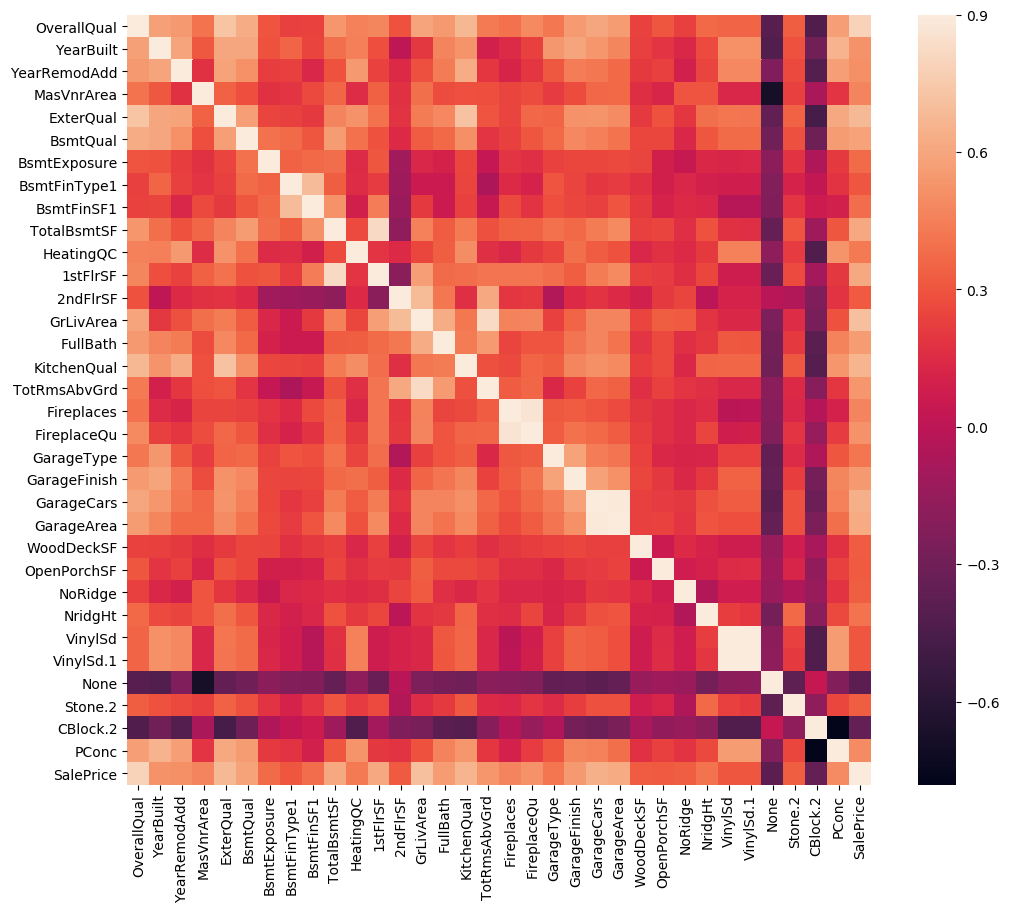

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x000000005B3E57B8>

In [8]:
using JuMP, PyCall, PyPlot
@pyimport pandas as pd
@pyimport seaborn as sns
train = pd.read_csv("train-clean.csv")
train = train[:drop](columns="Id")
corrmat = train[:corr]();
salePrice = corrmat["SalePrice"]

index = 1
li = corrmat[:columns][:values]

for i in salePrice
    if abs(i) < 0.3
        train = train[:drop](columns = li[index])
    end
    index = index + 1
end

corrmat = train[:corr]();
plt[:figure](figsize=(12,10))
sns.heatmap(corrmat, vmax=0.9)

train[:to_csv]("train-clean-2.csv")

#### Importing data

In [2]:
using JuMP, NamedArrays
raw_data = readcsv("train-clean-2.csv");
(M, N) = size(raw_data);

n_labels = 2:N  
n_ids = 2:M 

raw_data[n_ids, n_labels]

ids = raw_data[n_ids, 1][:]   
labels = raw_data[1, n_labels][:]
labels = vcat(labels, "Constant")

A = convert(Array{Float64,2}, raw_data[n_ids, n_labels])
B = ones(M-1)
data = hcat(A, B);

raw_prices = readcsv("train-sale-prices.csv")
prices = convert(Array{Float64}, raw_prices[n_ids]);

### 3.2 Regression with Least Square

In [14]:
using JuMP, Mosek

m_ls = Model(solver=MosekSolver(LOG=0,MSK_IPAR_MAX_NUM_WARNINGS= 1))

@variable(m_ls, x[1:N])
@objective(m_ls, Min, sum( (prices - data*x).^2 ) )

solve(m_ls)

coeffs_ls = getvalue(x)
println("The value of the cost function is: ", getobjectivevalue(m_ls))

MOSEK warning 57: A large value of -3.5e+09 has been specified in cx for variable '' (0).
The value of the cost function is: 1.5943854210561875e12


##### Discussion
As we can see from the output warning, some of the coefficients are large. Since it renders the model vulnerable to overfitting, this regression appraoch is not ideal. To improve the model, we would like to reduce the complexity of the coefficients by regularizations.

### 3.3 Least Square Regression with Different Regularizations

#### 3.3.1 L2 Regularization (Ridge Regression)

##### solution

In [3]:
using JuMP, Mosek

function solveOpt(lambda)
    m_l2 = Model(solver=MosekSolver(LOG=0, MSK_IPAR_MAX_NUM_WARNINGS=0))

    @variable(m_l2, x[1:N])
    @objective(m_l2, Min, sum( (prices - data*x).^2 ) + lambda*( sum(x.^2) ) )

    solve(m_l2)

    coeffs_l2 = getvalue(x)
    J1 = getvalue(sum((prices - data*x).^2))
    J2 = getvalue(sum(x.^2))
    return (J1, J2, coeffs_l2)
end

# (J1, J2, coeff) = solveOpt(0.06);

34-element Array{Float64,1}:
   12856.4    
       1.28486
      14.007  
      35.1065 
   10870.7    
    4456.71   
    6180.41   
    1130.62   
      10.7432 
      -4.01137
    2003.32   
      37.794  
      18.3089 
       ⋮      
       4.00267
      19.2277 
       9.41637
   44824.3    
   33241.6    
   -6411.14   
    7784.04   
   13980.0    
    7390.63   
    6347.15   
    3814.15   
 -182269.0    

##### Trade-off Analysis

In [12]:
Npts = 6
J1 = zeros(Npts)
J2 = zeros(Npts)
for (i,λ) in enumerate(logspace(-3,0,Npts))
    print(λ, " ")
    (J1[i], J2[i], coef) = solveOpt(λ)
end;


0.001 0.003981071705534973 0.015848931924611134 0.06309573444801933 0.251188643150958 1.0 

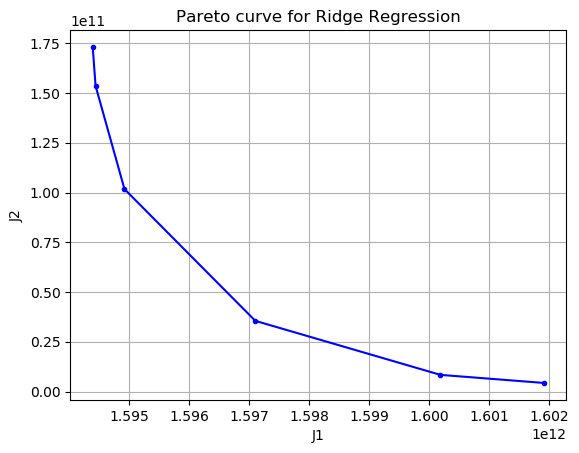

In [13]:
using PyPlot
plot(J1, J2, "b.-" )
xlabel("J1")
ylabel("J2");
title("Pareto curve for Ridge Regression")
grid()

From the graph, we can see that when $\lambda$ is small, the value of the least square cost function is also small. It reaches at the optimum roughly at $\lambda=0.06$:

In [16]:
(J1, J2, coeff) = solveOpt(0.06);
println("The value of the least sqaure cost function is: ", J1)

println("\nThe coefficients are: ")
coeff_l2 = Dict( zip(labels, coeff) )

The value of the least sqaure cost function is: 1.5943854210558845e12

The coefficients are: 


Dict{Any,Float64} with 34 entries:
  "YearBuilt"    => 56.5946
  "FireplaceQu"  => 327.529
  "GarageArea"   => 4.1163
  "Constant"     => -4.20077e5
  "CBlock.2"     => 5000.57
  "VinylSd.1"    => 7314.49
  "1stFlrSF"     => 35.263
  "GrLivArea"    => 15.7418
  "TotRmsAbvGrd" => 2596.49
  "BsmtFinSF1"   => 10.6712
  "TotalBsmtSF"  => -2.9396
  "YearRemodAdd" => 83.7866
  "Fireplaces"   => 6689.36
  "OpenPorchSF"  => 8.97463
  "VinylSd"      => -6864.37
  "FullBath"     => 989.746
  "PConc"        => 1750.34
  "BsmtQual"     => 3990.13
  "WoodDeckSF"   => 18.3898
  "None"         => 14315.9
  "BsmtFinType1" => 1067.12
  "GarageType"   => -463.527
  "GarageFinish" => 2486.9
  "OverallQual"  => 12680.4
  "ExterQual"    => 10467.0
  ⋮              => ⋮

##### Discussion
Compared with naive least sqaure regression, some improvements can be observed. When we apply a small $\lambda$ value on the L2 regularization, without raising the cost much (percentage-wise), we manage to get rid of coefficients values that are too large. This make sense because l2 cost is a squared value. If we assign too much weight on $\lambda$, the value of the cost funtion will be huge. Another observation we can make is that some coefficents, such as "YearBuilt", are close but not equal to zero, which fits what we have predicted in part b1 of mathematic model.  To further simplify the coefficients of the model, we will apply L1 regularization to get rid of unwanted labels.

#### 3.3.2 L1 Regularization (Lasso Regression)

##### solution

In [82]:
using JuMP, Mosek

function solveOpt(lambda)
    m_l1 = Model(solver=MosekSolver(LOG=0, MSK_IPAR_MAX_NUM_WARNINGS=0))

    @variable(m_l1, x[1:N])
    @variable(m_l1, t[1:N])
    for i in 1:N
        @constraint(m_l1, t[i] >= x[i])
        @constraint(m_l1, t[i] >= -x[i])
    end
    @objective(m_l1, Min, sum( (prices - data*x).^2 ) + lambda*sum(t[i] for i in 1:N) )

    solve(m_l1)

    coeffs_l1 = getvalue(x)
    J1 = getvalue(sum((prices - data*x).^2))
    J2 = getvalue(sum(t[i] for i in 1:N))
    return (J1, J2, coeffs_l1)
end

# (J1, J2, coeff) = solveOpt(65000);

##### Trade-off Analysis

In [83]:
Npts = 6
J1 = zeros(Npts)
J2 = zeros(Npts)
for (i,λ) in enumerate(logspace(4,6,Npts))
    print(λ, " ")
    (J1[i], J2[i], coef) = solveOpt(λ)
end;

10000.0 25118.864315095823 63095.7344480193 158489.3192461114 398107.1705534969 1.0e6 

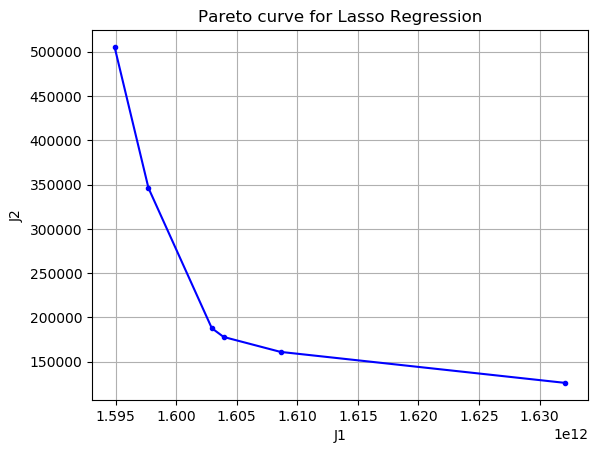

In [84]:
using PyPlot
plot(J1, J2, "b.-" )
xlabel("J1")
ylabel("J2");
title("Pareto curve for Lasso Regression")
grid()

From the graph, we can see that when $\lambda$ is large, the value of the least square cost function remains unchanged much. It reaches at the optimum roughly at λ=65000:

In [85]:
(J1, J2, coeff) = solveOpt(65000);
println("The value of the least sqaure cost function is: ", J1)

println("\nThe coefficients are: ")
coeff_l1 = Dict( zip(labels, coeff) )

The value of the least sqaure cost function is: 1.6029675473134233e12

The coefficients are: 


Dict{Any,Float64} with 34 entries:
  "YearBuilt"    => -38.082
  "FireplaceQu"  => 277.349
  "GarageArea"   => 4.67821
  "Constant"     => -0.0722712
  "CBlock.2"     => 6704.54
  "VinylSd.1"    => 3578.0
  "1stFlrSF"     => 39.8749
  "GrLivArea"    => 11.565
  "TotRmsAbvGrd" => 2374.15
  "BsmtFinSF1"   => 10.8627
  "TotalBsmtSF"  => -4.74774
  "YearRemodAdd" => -42.1429
  "Fireplaces"   => 6303.16
  "OpenPorchSF"  => 10.0593
  "VinylSd"      => -1387.28
  "FullBath"     => 2417.92
  "PConc"        => 4795.61
  "BsmtQual"     => 4849.23
  "WoodDeckSF"   => 20.031
  "None"         => 13400.7
  "BsmtFinType1" => 1178.14
  "GarageType"   => -281.751
  "GarageFinish" => 2788.3
  "OverallQual"  => 13033.4
  "ExterQual"    => 11131.2
  ⋮              => ⋮

##### Discussion
Opposite to L2 regularization, we can see we need a much larger $\lambda$ value for L1 regularization to make the least square cost low. This is becuase the regularization expression is no longer in sqaured form. 

#### 3.3.2 L1 and L2 Regularization 

In [15]:
using JuMP, Mosek

lambda = 1;
mu = 1;
function solveOpt(lambda, mu)
    m_l12 = Model(solver=MosekSolver(LOG=0, MSK_IPAR_MAX_NUM_WARNINGS=0))

    @variable(m_l12, x[1:N])
    @variable(m_l12, t[1:N])
    for i in 1:N
        @constraint(m_l12, t[i] >= x[i])
        @constraint(m_l12, t[i] >= -x[i])
    end
    @objective(m_l12, Min, sum( (prices - data*x).^2 ) + lambda*sum(x.^2) + mu*sum(t[i] for i in 1:N)  )

    solve(m_l12)

    coeffs_l1 = getvalue(x)
    J1 = getvalue(sum( (prices - data*x).^2 ))
    J2 = getvalue(sum(x.^2))
    J3 = getvalue(sum(t[i] for i in 1:N))
    
    return(J1, J2, J3, coeffs_l1)
end

(J1, J2, J3, coeffs) = solveOpt(0.007, 37500)
display(coeffs)

34-element Array{Float64,1}:
  13000.3    
    -34.7394 
    -35.1345 
     34.9725 
  11116.9    
   4795.26   
   6175.12   
   1173.02   
     10.8287 
     -4.69572
   2187.1    
     39.5971 
     19.5488 
      ⋮      
      4.3562 
     19.8878 
      9.89669
  44128.7    
  32717.6    
  -3444.43   
   5510.21   
  13567.9    
   7115.35   
   6881.64   
   4877.74   
 -19964.1    

In [5]:
Npts = 8
J1 = zeros(Npts)
J2 = zeros(Npts)
J3 = zeros(Npts
for (i,λ) in enumera)
mu = logspace(4, 6, Npts)te(logspace(-3,0,Npts))
    println("λ: ", λ, " mu: ", mu[i], " ")
    (J1[i], J2[i], J3[i], coef) = solveOpt(λ, mu[i])
end;

λ: 0.001 mu: 10000.0 
λ: 0.0026826957952797246 mu: 19306.977288832495 
λ: 0.0071968567300115215 mu: 37275.937203149384 
λ: 0.019306977288832506 mu: 71968.56730011514 
λ: 0.0517947467923121 mu: 138949.5494373139 
λ: 0.13894954943731377 mu: 268269.57952797273 
λ: 0.372759372031494 mu: 517947.4679231213 
λ: 1.0 mu: 1.0e6 


8-element Array{Float64,1}:
 1.59498e12
 1.59658e12
 1.60183e12
 1.60308e12
 1.60373e12
 1.60566e12
 1.61291e12
 1.63365e12

8-element Array{Float64,1}:
 9.85693e10
 4.54858e10
 4.4995e9  
 3.87845e9 
 3.67767e9 
 3.32432e9 
 2.71238e9 
 1.79696e9 

8-element Array{Float64,1}:
 4.98924e5
 3.95631e5
 2.14792e5
 1.85642e5
 1.79043e5
 1.69723e5
 1.51685e5
 1.24404e5

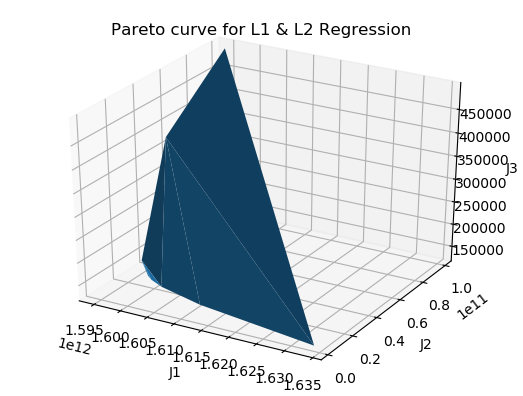

In [14]:
display(J1)
display(J2)
display(J3)

using PyPlot
plot_trisurf(J1, J2, J3)
xlabel("J1")
ylabel("J2");
zlabel("J3");
title("Pareto curve for L1 & L2 Regression")
grid()

### 3.4 The Huber Loss

#### 3.4.1 Regression with the Huber Loss

In [36]:
using JuMP, Mosek

H = 0.18;

m_h = Model(solver=MosekSolver(LOG=0))

@variable(m_h, w[1:M-1])
@variable(m_h, v[1:M-1])
@variable(m_h, x[1:N])
for i in 1:M-1
    @constraint(m_h, w[i] <= H)
    @constraint(m_h, v[i] >= 0)
    @constraint(m_h, w[i] + v[i] >= prices[i]-sum(data[i,j]*x[j] for j in 1:N) )
    @constraint(m_h, w[i] + v[i] >= sum(data[i,j]*x[j] for j in 1:N)-prices[i] )
end
@objective(m_h, Min, sum(w.^2) + 2*M*sum(v[i] for i in 1:M-1))

solve(m_h)
display(getvalue(x))

34-element Array{Float64,1}:
 10475.4      
   139.864    
   183.894    
    23.9165   
  5933.03     
  -377.232    
  3697.81     
  -235.129    
    21.0381   
    15.7502   
  2001.7      
    58.6656   
    52.6228   
     ⋮        
    23.5674   
    18.7461   
    23.7133   
 25415.4      
 28486.8      
  4465.81     
 -4523.22     
  8402.42     
 10153.4      
   -53.9175   
  1575.65     
    -7.11642e5

### 3.5 Huber Loss with Regularization

#### 3.5.1 Huber Loss with L1 Regularization

In [93]:
using JuMP, Mosek

H = 0.18;
lambda = 1;

function solveOpt(lambda)
    m_h2 = Model(solver=MosekSolver(LOG=0))

    @variable(m_h2, w[1:M-1])
    @variable(m_h2, v[1:M-1])
    @variable(m_h2, x[1:N])
    for i in 1:M-1
        @constraint(m_h2, w[i] <= H)
        @constraint(m_h2, v[i] >= 0)
        @constraint(m_h2, w[i] + v[i] >= prices[i]-sum(data[i,j]*x[j] for j in 1:N) )
        @constraint(m_h2, w[i] + v[i] >= sum(data[i,j]*x[j] for j in 1:N)-prices[i] )
    end
    @objective(m_h2, Min, sum(w.^2) + 2*H*sum(v[i] for i in 1:M-1) + lambda*sum(x.^2))

    solve(m_h2)
    coeffs_h2 = getvalue(x)
    J1 = getvalue( sum(w.^2) + 2*H*sum(v[i] for i in 1:M-1))
    J2 = getvalue(sum(x.^2))
    return(J1, J2, coeffs_h2)
end

(J1, J2, coeff) = solveOpt(7.8)
display(coeff)
# println(getobjectivevalue(m_h2))

(1.4221018296863973e7, 80131.82386356464, [109.688, 70.3256, -76.0524, 33.2893, 47.9776, 43.6027, 43.5364, 34.724, 14.4531, 48.3493  …  62.0555, 4.14, 10.9251, 29.3164, 29.7829, -2.39198, 10.0251, -35.7658, 40.3203, -1.10757])

In [91]:
Npts = 3
J1 = zeros(Npts)
J2 = zeros(Npts)
for (i,λ) in enumerate(logspace(0,1.6,Npts))
    println("λ: ", λ)
    (J1[i], J2[i], coef) = solveOpt(λ)
end;

λ: 1.0e-10
λ: 1.0
λ: 1.0e10


3-element Array{Float64,1}:
 1.4221e7
 1.4221e7
 1.4221e7

3-element Array{Float64,1}:
 80131.8
 80131.8
 80131.8

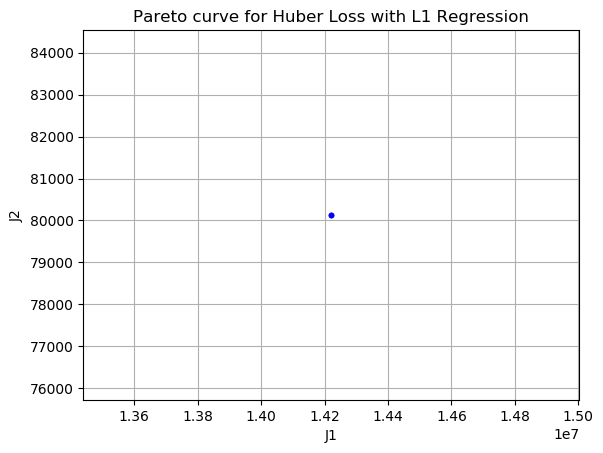

In [92]:
display(J1)
display(J2)
using PyPlot
plot(J1, J2, "b.-" )
xlabel("J1")
ylabel("J2");
title("Pareto curve for Huber Loss with L1 Regression")
grid()

#### 3.5.2 Huber Loss with L2 Regularization

In [230]:
using JuMP, Mosek

H = 0.18;
lambda = 1;

function solveOpt(lambda)
    m_h1 = Model(solver=MosekSolver(LOG=0))

    @variable(m_h1, w[1:M-1])
    @variable(m_h1, v[1:M-1])
    @variable(m_h1, x[1:N])
    @variable(m_h1, t[1:N])
    for j in 1:N
        @constraint(m_h1, t[j] >= x[j])
        @constraint(m_h1, t[j] >= -x[j])
    end
    for i in 1:M-1
        @constraint(m_h1, w[i] <= H)
        @constraint(m_h1, v[i] >= 0)
        @constraint(m_h1, w[i] + v[i] >= prices[i]-sum(data[i,j]*x[j] for j in 1:N) )
        @constraint(m_h1, w[i] + v[i] >= sum(data[i,j]*x[j] for j in 1:N)-prices[i] )
    end
    @objective(m_h1, Min, sum(w.^2) + 2*H*sum(v[i] for i in 1:M-1) + lambda*sum(t[i] for i in 1:N))

    solve(m_h1)
    coeffs_h1 = getvalue(x)
    J1 = getvalue(sum(w.^2) + 2*H*sum(v[i] for i in 1:M-1))
    J2 = getvalue(sum(t[i] for i in 1:N))
    return (J1, J2, coeffs_h1)
end

(J1, J2, coeff) = solveOpt(8)
display(coeff)
# println(getobjectivevalue(m_h1))

34-element Array{Float64,1}:
 11323.1       
    -7.3523    
   -41.3766    
    23.8319    
  5999.06      
   673.918     
  2937.3       
   199.824     
    20.8209    
    12.6465    
  3231.95      
    54.5336    
    47.328     
     ⋮         
    39.5763    
    22.8479    
    26.8181    
  5314.37      
 10242.9       
  1688.16      
     6.14322e-6
  3500.37      
  4045.06      
     5.8223e-8 
  4409.98      
    -4.72696e-8

In [82]:
Npts = 9
J1 = zeros(Npts)
J2 = zeros(Npts)
for (i,λ) in enumerate(logspace(0,1.8,Npts))
    println("λ: ", λ)
    (J1[i], J2[i], coef) = solveOpt(λ)
end;

λ: 1.0
λ: 1.6788040181225603
λ: 2.8183829312644537
λ: 4.731512589614805
λ: 7.943282347242816
λ: 13.33521432163324
λ: 22.3872113856834
λ: 37.583740428844415
λ: 63.09573444801933


9-element Array{Float64,1}:
 1.4221e7 
 1.4259e7 
 1.42906e7
 1.43261e7
 1.43526e7
 1.43803e7
 1.44266e7
 1.44855e7
 1.45792e7

9-element Array{Float64,1}:
 80131.8
 49968.2
 35071.7
 25563.4
 20967.9
 18262.9
 15608.8
 13614.4
 11698.7

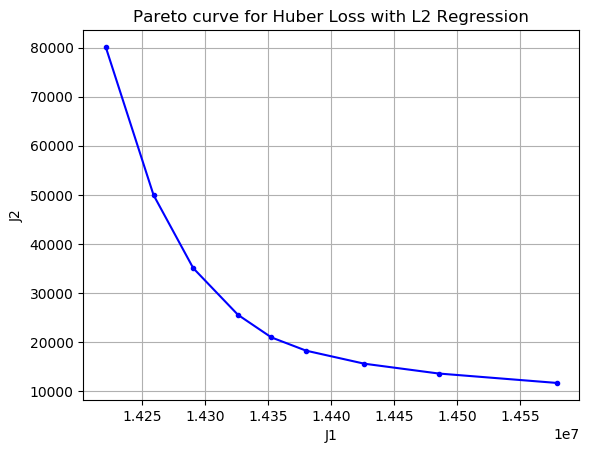

In [225]:
display(J1)
display(J2)
using PyPlot
plot(J1, J2, "b.-" )
xlabel("J1")
ylabel("J2");
title("Pareto curve for Huber Loss with L2 Regression")
grid()

#### 3.5.3 Huber Loss with L1 and L2 Regularization

In [86]:
using JuMP, Mosek

H = 0.18;
lambda = 1;
mu = 1;
function solveOpt(lambda, mu)
    m_h12 = Model(solver=MosekSolver(LOG=0))

    @variable(m_h12, w[1:M-1])
    @variable(m_h12, v[1:M-1])
    @variable(m_h12, x[1:N])
    @variable(m_h12, t[1:N])
    for j in 1:N
        @constraint(m_h12, t[j] >= x[j])
        @constraint(m_h12, t[j] >= -x[j])
    end
    for i in 1:M-1
        @constraint(m_h12, w[i] <= H)
        @constraint(m_h12, v[i] >= 0)
        @constraint(m_h12, w[i] + v[i] >= prices[i]-sum(data[i,j]*x[j] for j in 1:N) )
        @constraint(m_h12, w[i] + v[i] >= sum(data[i,j]*x[j] for j in 1:N)-prices[i] )
    end
    @objective(m_h12, Min, sum(w.^2) + 2*H*sum(v[i] for i in 1:M-1) + lambda*sum(x.^2) + mu*sum(t[i] for i in 1:N))

    solve(m_h12)
    coeffs_h12 = getvalue(x)
    J1 = getvalue(sum(w.^2) + 2*H*sum(v[i] for i in 1:M-1))
    J2 = getvalue(sum(x.^2))
    J3 = getvalue(sum(t[i] for i in 1:N))
    return(J1, J2, J3, coeffs_h12)
end

# display(coeffs_h12)
# println(getobjectivevalue(m_h12))

solveOpt (generic function with 2 methods)

In [93]:
Npts = 20
J1 = zeros(Npts)
J2 = zeros(Npts)
J3 = zeros(Npts)
mu = logspace(4, 6, Npts)
for (i,λ) in enumerate(logspace(-3,0,Npts))
    println("λ: ", λ, " mu: ", mu[i], " ")
    (J1[i], J2[i], J3[i], coef) = solveOpt(λ, mu[i])
end

λ: 0.001 mu: 10000.0 
λ: 0.001438449888287663 mu: 12742.749857031347 
λ: 0.00206913808111479 mu: 16237.76739188721 
λ: 0.002976351441631319 mu: 20691.3808111479 
λ: 0.004281332398719396 mu: 26366.50898730361 
λ: 0.00615848211066026 mu: 33598.18286283781 
λ: 0.008858667904100823 mu: 42813.32398719396 
λ: 0.012742749857031341 mu: 54555.947811685146 
λ: 0.018329807108324356 mu: 69519.27961775605 
λ: 0.026366508987303583 mu: 88586.67904100832 
λ: 0.0379269019073225 mu: 112883.78916846884 
λ: 0.0545559478116852 mu: 143844.9888287663 
λ: 0.0784759970351461 mu: 183298.07108324376 
λ: 0.11288378916846892 mu: 233572.14690901214 
λ: 0.16237767391887217 mu: 297635.14416313195 
λ: 0.23357214690901223 mu: 379269.0190732246 
λ: 0.3359818286283782 mu: 483293.0238571752 
λ: 0.4832930238571753 mu: 615848.2110660267 
λ: 0.6951927961775606 mu: 784759.9703514606 
λ: 1.0 mu: 1.0e6 


20-element Array{Float64,1}:
 1.49657e7
 1.52016e7
 1.53498e7
 1.54552e7
 1.56551e7
 1.59488e7
 1.63943e7
 1.69954e7
 1.72018e7
 1.74571e7
 1.79056e7
 1.90066e7
 2.07029e7
 2.15549e7
 2.39902e7
 2.72202e7
 3.20847e7
 3.4183e7 
 3.92498e7
 5.37403e7

20-element Array{Float64,1}:
 11019.4 
 10358.6 
  9968.0 
  9399.65
  8916.15
  8665.07
  8768.17
  8608.28
  8169.71
  7617.2 
  6953.99
  6291.61
  5868.02
  5034.65
  3860.96
  3658.34
  4491.28
  3992.23
  3136.0 
  1600.0 

20-element Array{Float64,1}:
 210.164 
 189.477 
 179.191 
 173.604 
 165.14  
 155.263 
 143.548 
 130.93  
 127.624 
 124.408 
 119.996 
 111.39  
 100.835 
  96.7788
  87.754 
  78.4663
  67.0169
  63.184 
  56.0   
  40.0   

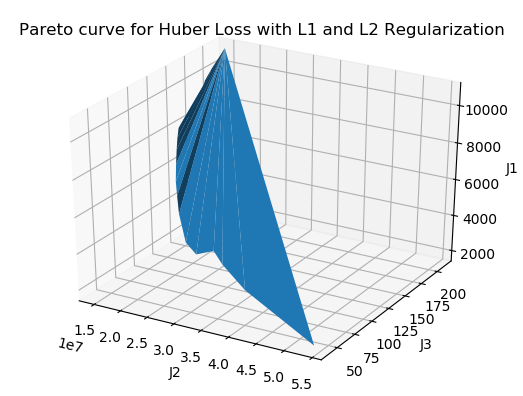

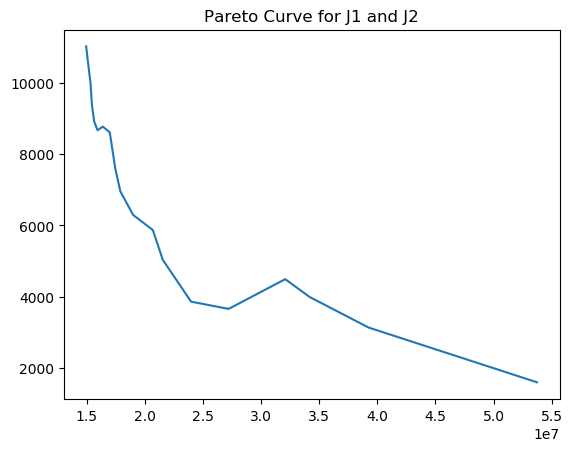

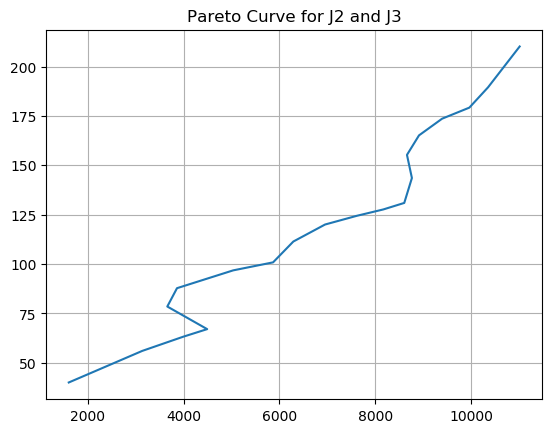

In [94]:
display(J1)
display(J2)
display(J3)

using PyPlot
plot_trisurf(J1, J3, J2)
xlabel("J2")
ylabel("J3");
zlabel("J1");
title("Pareto curve for Huber Loss with L1 and L2 Regularization")
grid()
figure()
plot(J1, J2)
title("Pareto Curve for J1 and J2")
grid
figure()
plot(J2, J3)
title("Pareto Curve for J2 and J3")
grid()

## 4. Results and discussion ##
Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

## 5. Conclusion ##
Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.